In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

# заметка, берем 3 и 4 параметр цветка, и первые 100 цветков

In [2]:
#перцептрон с лекции


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

In [3]:
# собственный перцептрон с 2 параметрами
class Perceptron2(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = np.zeros(3)
        self.errors_ = []

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, 0)

    def fit(self, X, y):

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                output = self.sigmoid(self.net_input(xi))
                error = target - output
                if target == 0:
                    error = -output
                elif target == 1:
                    error = 1 - output
                self.w_[1:] += self.eta * xi * error * output * (1 - output)
                self.w_[0] += self.eta * error * output * (1 - output)
                errors += int(self.predict(xi) != target)
            self.errors_.append(errors)
        return self

In [4]:
# тот же самый перцептрон только который работает с 4 параметрами
class Perceptron3(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = np.zeros(5)
        self.errors_ = []

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, 0)

    def fit(self, X, y):

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                output = self.sigmoid(self.net_input(xi))
                error = target - output
                if target == 0:
                    error = -output
                elif target == 1:
                    error = 1 - output
                self.w_[1:] += self.eta * xi * error * output * (1 - output)
                self.w_[0] += self.eta * error * output * (1 - output)
                errors += int(self.predict(xi) != target)
            self.errors_.append(errors)
        return self


In [5]:
# функция которая рисует линию разделения

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("o", "x", "s", "^", "v")
    colors = ("red", "blue", "green", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)

In [6]:
# создаем 4 выборки - test 0..40 , test  - 50..90 и проверочные 40..50, 90..100

Xsetosa_train = df.iloc[0:40, [2, 3]].values
Ysetosa_train = df.iloc[0:40, 4].values
Xsetosa_test = df.iloc[40:50, [2, 3]].values
Ysetosa_test = df.iloc[40:50, 4].values
Xversicolor_train = df.iloc[50:90, [2, 3]].values
Yversicolor_train = df.iloc[50:90, 4].values
Xversicolor_test = df.iloc[90:100, [2, 3]].values
Yversicolor_test = df.iloc[90:100, 4].values

# разделяем на 4 группы, тест х у, трейн х у
X_train = np.concatenate((Xsetosa_train, Xversicolor_train))
Y_train = np.concatenate((Ysetosa_train, Yversicolor_train))
X_test = np.concatenate((Xsetosa_test, Xversicolor_test))
Y_test = np.concatenate((Ysetosa_test, Yversicolor_test))

# перемешиваем набор train
XY = list(zip(X_train, Y_train))
random.shuffle(XY)
X_train, Y_train = map(np.array, zip(*XY))

Y_train = np.where(Y_train == 'Iris-setosa', 0, 1)
Y_train_for_first_perceptron = np.where(Y_train == 0, -1, 1)

# перемешиваем набор test
data = list(zip(X_test, Y_test))
random.shuffle(data)
X_test, Y_test = map(np.array, zip(*data))
Y_test = np.where(Y_test == 'Iris-setosa', 0, 1)
Y_test_for_first_perceptron = np.where(Y_test == 0, -1, 1)



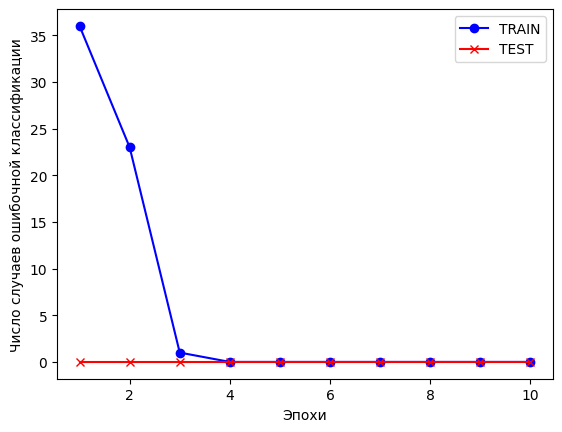

C:\Users\vita2\AppData\Local\Temp\ipykernel_2548\2520614715.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)


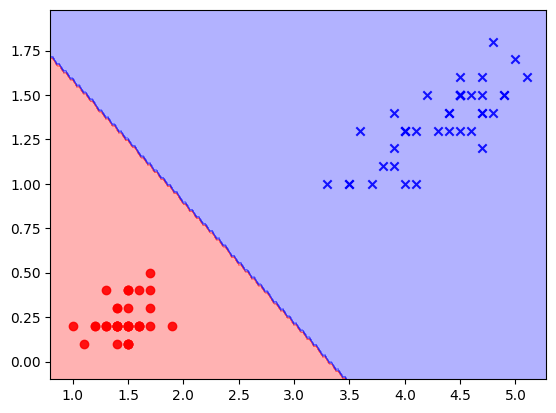

In [7]:

# 2 перцептрон, его график ошибок и прямая
ppn2 = Perceptron2(eta=0.1, n_iter=10)
ppn2.fit(X_train, Y_train)



plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, color='blue', marker="o", label="TRAIN")
ppn2.errors_ = []

ppn2.fit(X_test, Y_test)

plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, color='red', marker="x", label="TEST")

plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.legend()
plt.show()

plt.show()

plot_decision_regions(X_train, Y_train, classifier=ppn2)
plt.show()


C:\Users\vita2\AppData\Local\Temp\ipykernel_2548\2520614715.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)


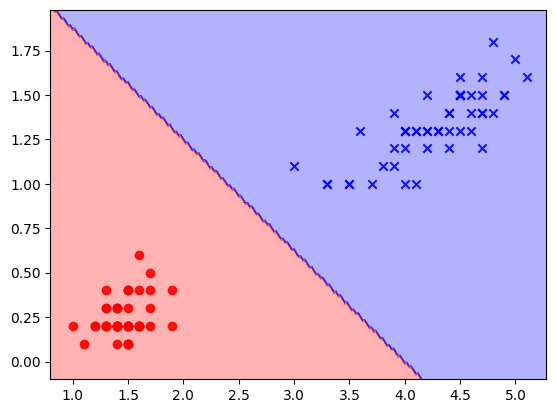

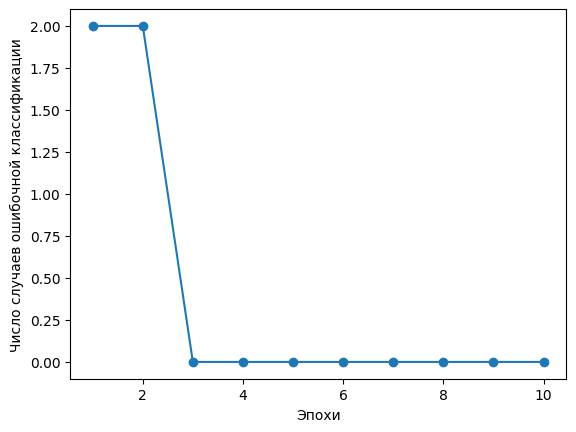

In [8]:
# разделяющая прямая по первому перцептрону
X = df.iloc[0:100, [2, 3]].values
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.show()

# график ошибок по 3 перцептрону
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.show()

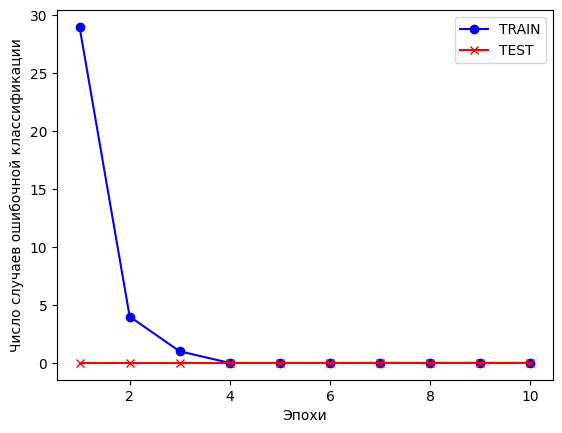

In [9]:
# создаем входные данные для 4 параметров
Xsetosa_train = df.iloc[0:40, [0, 1, 2, 3]].values
Ysetosa_train = df.iloc[0:40, 4].values
Xsetosa_test = df.iloc[40:50, [0, 1, 2, 3]].values
Ysetosa_test = df.iloc[40:50, 4].values
Xversicolor_train = df.iloc[50:90, [0, 1, 2, 3]].values
Yversicolor_train = df.iloc[50:90, 4].values
Xversicolor_test = df.iloc[90:100, [0, 1, 2, 3]].values
Yversicolor_test = df.iloc[90:100, 4].values

# разделяем на 4 группы, тест х у, трейн х у
X_train = np.concatenate((Xsetosa_train, Xversicolor_train))
Y_train = np.concatenate((Ysetosa_train, Yversicolor_train))
X_test = np.concatenate((Xsetosa_test, Xversicolor_test))
Y_test = np.concatenate((Ysetosa_test, Yversicolor_test))

# перемешиваем набор train
XY = list(zip(X_train, Y_train))
random.shuffle(XY)
X_train, Y_train = map(np.array, zip(*XY))
Y_train = np.where(Y_train == 'Iris-setosa', 0, 1)

# перемешиваем набор test
data = list(zip(X_test, Y_test))
random.shuffle(data)
X_test, Y_test = map(np.array, zip(*data))
Y_test = np.where(Y_test == 'Iris-setosa', 0, 1)

ppn3 = Perceptron3(eta=0.01, n_iter=10)
ppn3.fit(X_train, Y_train)

plt.plot(range(1, len(ppn3.errors_) + 1), ppn3.errors_, color='blue', marker="o", label="TRAIN")
ppn3.errors_ = []

ppn3.fit(X_test, Y_test)

plt.plot(range(1, len(ppn3.errors_) + 1), ppn3.errors_, color='red', marker="x", label="TEST")

plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.legend()
plt.show()

In [10]:
# переключение на другие данные (9пункт)

Xvirginica_train = df.iloc[100:140, [2, 3]].values
Yvirginica_train = df.iloc[100:140, 4].values
Xvirginica_test = df.iloc[140:150, [2, 3]].values
Yvirginica_test = df.iloc[140:150, 4].values
Xversicolor_train = df.iloc[50:90, [2, 3]].values
Yversicolor_train = df.iloc[50:90, 4].values
Xversicolor_test = df.iloc[90:100, [2, 3]].values
Yversicolor_test = df.iloc[90:100, 4].values

# разделяем на 4 группы, тест х у, трейн х у
X_train = np.concatenate((Xvirginica_train, Xversicolor_train))
Y_train = np.concatenate((Yvirginica_train, Yversicolor_train))
X_test = np.concatenate((Xvirginica_test, Xversicolor_test))
Y_test = np.concatenate((Yvirginica_test, Yversicolor_test))

# перемешиваем набор train
XY = list(zip(X_train, Y_train))
random.shuffle(XY)
X_train, Y_train = map(np.array, zip(*XY))

Y_train = np.where(Y_train == 'Iris-versicolor', 0, 1)
Y_train_for_first_perceptron = np.where(Y_train == 0, -1, 1)

# перемешиваем набор test
data = list(zip(X_test, Y_test))
random.shuffle(data)
X_test, Y_test = map(np.array, zip(*data))
Y_test = np.where(Y_test == 'Iris-versicolor', 0, 1)
Y_test_for_first_perceptron = np.where(Y_test == 0, -1, 1)

Xvirginica_train = df.iloc[100:140, [0, 1, 2, 3]].values
Yvirginica_train = df.iloc[100:140, 4].values
Xvirginica_test = df.iloc[140:150, [0, 1, 2, 3]].values
Yvirginica_test = df.iloc[140:150, 4].values
Xversicolor_train = df.iloc[50:90, [0, 1, 2, 3]].values
Yversicolor_train = df.iloc[50:90, 4].values
Xversicolor_test = df.iloc[90:100, [0, 1, 2, 3]].values
Yversicolor_test = df.iloc[90:100, 4].values

# разделяем на 4 группы, тест х у, трейн х у
X_train_4par = np.concatenate((Xvirginica_train, Xversicolor_train))
Y_train_4par = np.concatenate((Yvirginica_train, Yversicolor_train))
X_test_4par = np.concatenate((Xvirginica_test, Xversicolor_test))
Y_test_4par = np.concatenate((Yvirginica_test, Yversicolor_test))

# перемешиваем набор train
XY = list(zip(X_train_4par, Y_train_4par))
random.shuffle(XY)
X_train_4par, Y_train_4par = map(np.array, zip(*XY))
Y_train_4par = np.where(Y_train_4par == "Iris-versicolor", 0, 1)


# перемешиваем набор test
data = list(zip(X_test_4par, Y_test_4par))
random.shuffle(data)
X_test_4par, Y_test_4par = map(np.array, zip(*data))
Y_test_4par = np.where(Y_test_4par == "Iris-versicolor", 0, 1)




C:\Users\vita2\AppData\Local\Temp\ipykernel_2548\2520614715.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)


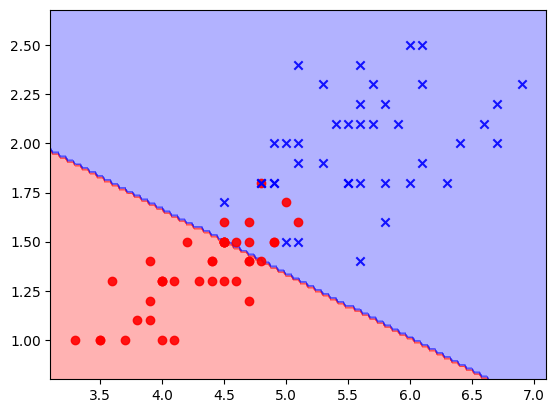

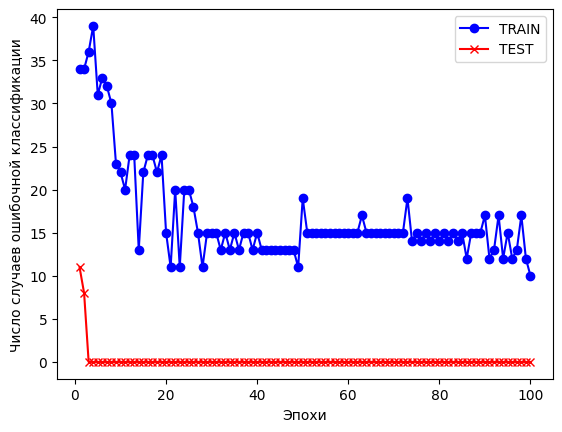

In [11]:
ppn_new1 = Perceptron(eta=0.1, n_iter=100)
ppn_new1.fit(X_train, Y_train_for_first_perceptron)
plot_decision_regions(X_train, Y_train_for_first_perceptron, classifier=ppn_new1)
plt.show()
plt.plot(range(1, len(ppn_new1.errors_) + 1), ppn_new1.errors_, color='blue', marker="o", label="TRAIN")
ppn_new1.errors_ = []

ppn_new1.fit(X_test, Y_test_for_first_perceptron)

plt.plot(range(1, len(ppn_new1.errors_) + 1), ppn_new1.errors_, color='red', marker="x", label="TEST")

plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.legend()
plt.show()

C:\Users\vita2\AppData\Local\Temp\ipykernel_2548\2520614715.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)


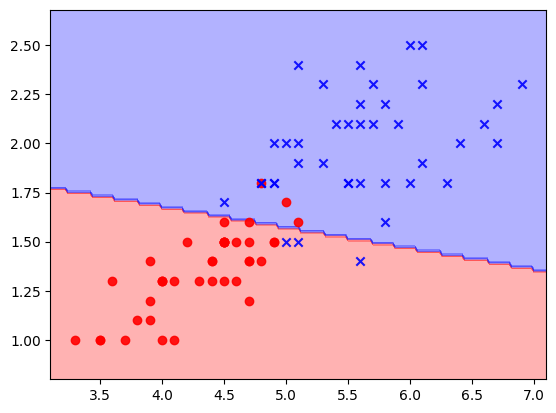

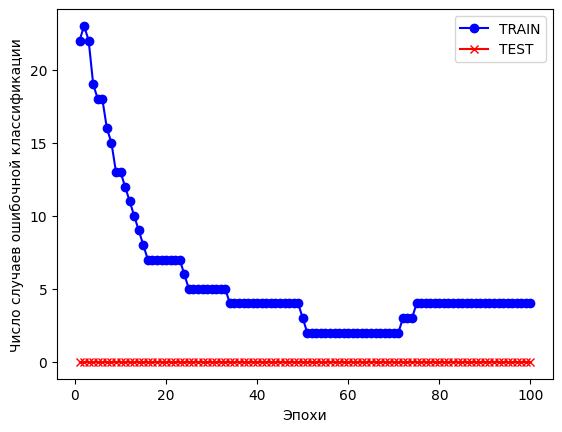

In [12]:
ppn_new2 = Perceptron2(eta=0.1, n_iter=100)
ppn_new2.fit(X_train, Y_train)
plot_decision_regions(X_train, Y_train, classifier=ppn_new2)
plt.show()
plt.plot(range(1, len(ppn_new2.errors_) + 1), ppn_new2.errors_, color='blue', marker="o", label="TRAIN")
ppn_new2.errors_ = []

ppn_new2.fit(X_test, Y_test)

plt.plot(range(1, len(ppn_new2.errors_) + 1), ppn_new2.errors_, color='red', marker="x", label="TEST")

plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.legend()
plt.show()

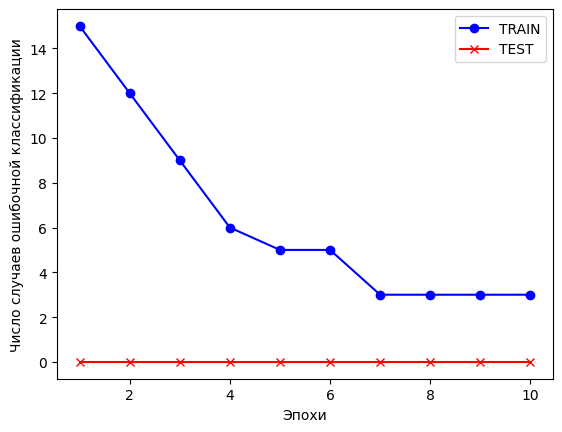

In [13]:
ppn_new3 = Perceptron3(eta=0.1, n_iter=10)
ppn_new3.fit(X_train_4par, Y_train_4par)

plt.show()
plt.plot(range(1, len(ppn_new3.errors_) + 1), ppn_new3.errors_, color='blue', marker="o", label="TRAIN")
ppn_new3.errors_ = []

ppn_new3.fit(X_test_4par, Y_test_4par)

plt.plot(range(1, len(ppn_new3.errors_) + 1), ppn_new3.errors_, color='red', marker="x", label="TEST")

plt.xlabel("Эпохи")
plt.ylabel("Число случаев ошибочной классификации")
plt.legend()
plt.show()